# Telco Customer Churn EDA

## Task Description ##

In this analysis I will focus on exploring the telco customer churn dataset. 
The target variable is 'churn' which indicates if a customer has cancelled their contract. 

The goal of this analysis is to identify patterns and correlations with the target variable and finally list some potential action items for a potential management audience. 

## Documentation ## 

This dataset was downloaded from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn/version/1?select=WA_Fn-UseC_-Telco-Customer-Churn.csv)

The data dictionary can be found the [IBM Communit URL](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Documents\dataSets\telco_customer_churn.csv')

# Data Understanding

In this section, we will focus on inspecting the data surface properties: 
 
- data format 
- number of records and features
- missing values

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Assuming that each row uniquely identify a contract related to a customer ID, I will drop the customerID column. 

In [6]:
df.drop('customerID', axis = 1, inplace = True)

**Observation**: 'TotalCharges' is stored as an object. I will convert it to numeric and pass coerce as error attribute.

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

**Logic**:

- I could assume that those values should be 0 as it could have originally been stored as NULL and finally replaced with empty string
- To support this idea I could have a look at the 'Tenure'. If the tenure is 0 then we can assume that these are new customers and the monthly charges value should be 0

In [8]:
df['tenure'][df.TotalCharges== 0].unique()

array([0], dtype=int64)

The hypothesis is confirmed. All observations where 'TotalCharges' equals ' ' have 0 tenure.
But what about the 'Monthly Charges'?

I'm going to investigate also 'MonthlyCharges' just to be sure to have clean data. However, I believe that the value of monthly charges is coming from order data which is stored when the customer signs in the contract. 
Hence, we shouldn't miss it. 

In [9]:
df['MonthlyCharges'][df.TotalCharges== 0]

488     52.55
753     20.25
936     80.85
1082    25.75
1340    56.05
3331    19.85
3826    25.35
4380    20.00
5218    19.70
6670    73.35
6754    61.90
Name: MonthlyCharges, dtype: float64

Hypothesis confirmed.

I will keep exploring the data quality.

In [10]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Missing Values

I want to get an idea of I should expect within each column for better understanding of telco stored data. 
I am going to iterate through all columns and return a list of the unique values stored in which one of them.

In [11]:
for c in df.columns: 
    if df[c].dtype == 'O':
        print(c,"\n",df[c].unique() )

gender 
 ['Female' 'Male']
Partner 
 ['Yes' 'No']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
MultipleLines 
 ['No phone service' 'No' 'Yes']
InternetService 
 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 
 ['No' 'Yes' 'No internet service']
OnlineBackup 
 ['Yes' 'No' 'No internet service']
DeviceProtection 
 ['No' 'Yes' 'No internet service']
TechSupport 
 ['No' 'Yes' 'No internet service']
StreamingTV 
 ['No' 'Yes' 'No internet service']
StreamingMovies 
 ['No' 'Yes' 'No internet service']
Contract 
 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 
 ['Yes' 'No']
PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn 
 ['No' 'Yes']


- Boolean values are mainly stored in Yes/No Format. 
- No major cleansing needed. I will only store Obj Data in lower cases. 
    This will make it easier when passing them as strings in future functions

I want to store all Obj Data in lower cases.

In [12]:
for c in df.columns: 
    if df[c].dtype == 'O':
        df[c] = df[c].str.lower()

Verify applied steps

In [13]:
for c in df.columns: 
    if df[c].dtype == 'O':
        print(c,"\n",df[c].unique())

gender 
 ['female' 'male']
Partner 
 ['yes' 'no']
Dependents 
 ['no' 'yes']
PhoneService 
 ['no' 'yes']
MultipleLines 
 ['no phone service' 'no' 'yes']
InternetService 
 ['dsl' 'fiber optic' 'no']
OnlineSecurity 
 ['no' 'yes' 'no internet service']
OnlineBackup 
 ['yes' 'no' 'no internet service']
DeviceProtection 
 ['no' 'yes' 'no internet service']
TechSupport 
 ['no' 'yes' 'no internet service']
StreamingTV 
 ['no' 'yes' 'no internet service']
StreamingMovies 
 ['no' 'yes' 'no internet service']
Contract 
 ['month-to-month' 'one year' 'two year']
PaperlessBilling 
 ['yes' 'no']
PaymentMethod 
 ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
Churn 
 ['no' 'yes']


Noticed that 'SeniorCitizen' is stored as integer, will convert into yes/no for now to plot it as bars

In [14]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].map(lambda x: 'yes' if x == 1  else 'no')
df.SeniorCitizen.unique()

array(['no', 'yes'], dtype=object)

## Observations on the Data ## 

The data set describes personas and membership details. 

We can try to identify trends and patterns related to the churn label based on two aspects. 


We are now confident to have a clean base to work on. The data understanding part is over and we will switch now to data exploration. 


## Plotting Categorical Data ##

First of all let's have a look at the telco churn rate. 

In [16]:
churn_share = round(df.Churn.value_counts()/len(df),2)
churn_share

no     0.73
yes    0.27
Name: Churn, dtype: float64

27% of the customers have stopped their memebership with the phone provider.

Let's have a look at the categorical data to identify which groups have a higer share of cancellations.

In [17]:
# Define Plot Style https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# plt.style.use('fivethirtyeight')

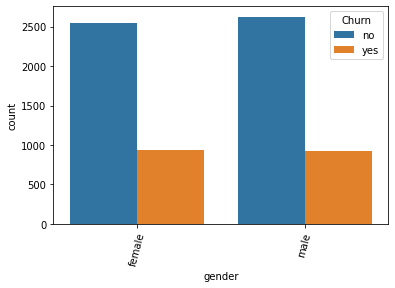

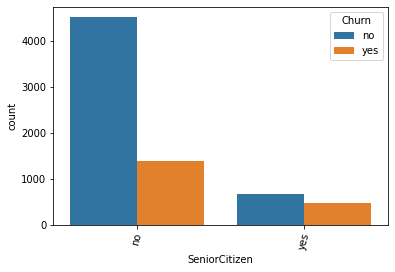

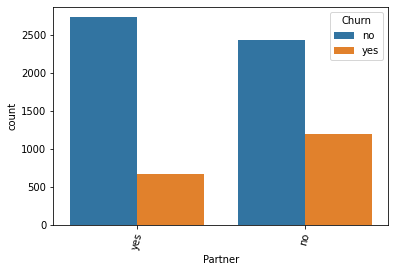

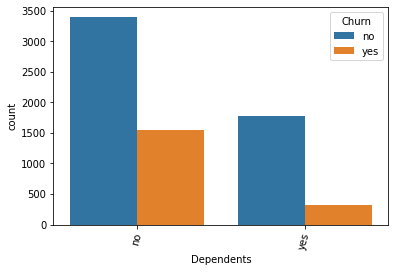

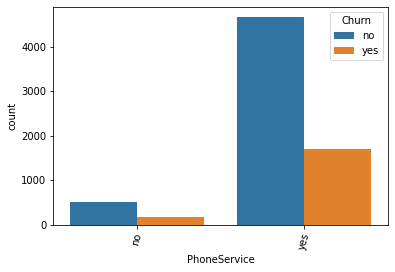

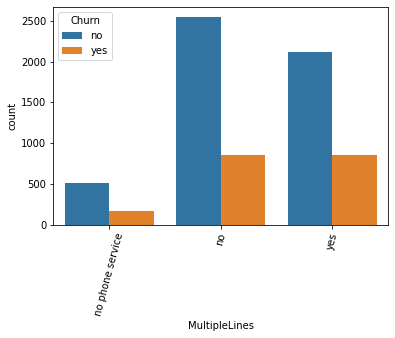

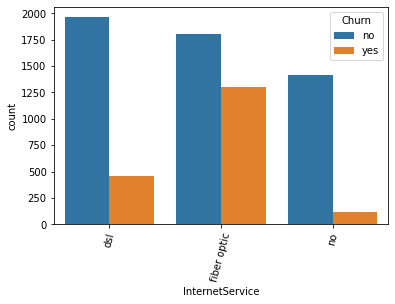

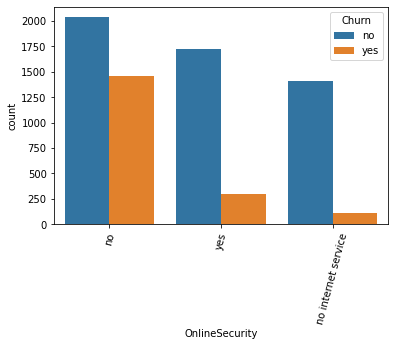

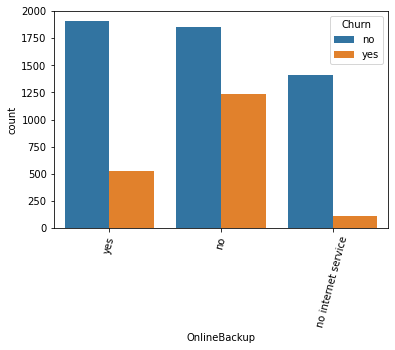

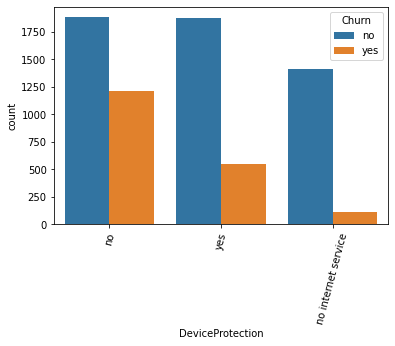

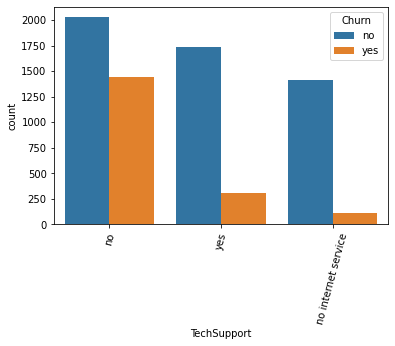

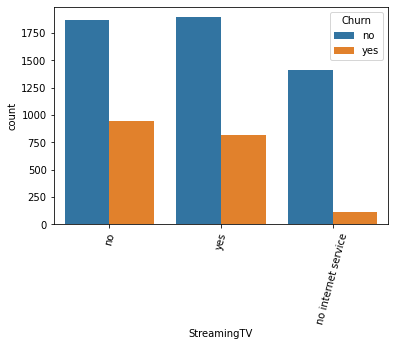

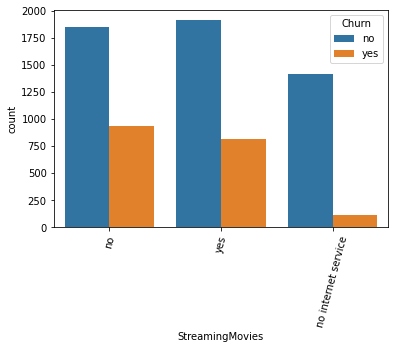

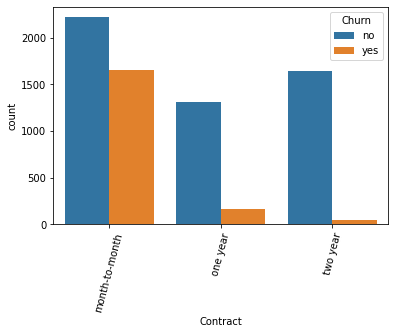

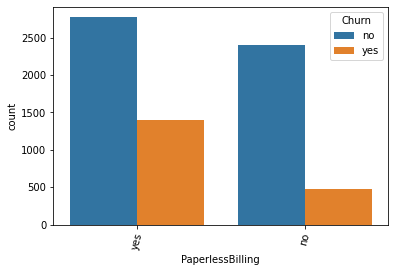

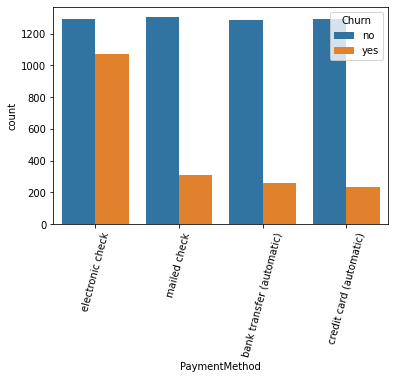

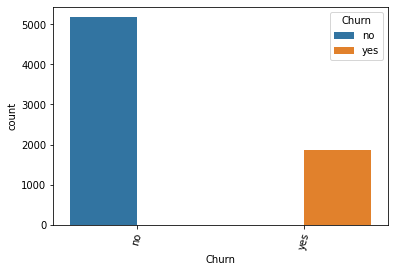

In [18]:
for c, n in enumerate([c for c in df.columns if df[c].dtype == 'O' and c != 'customerID']): 
    plt.figure(c)
    _ = sns.countplot(data = df, x = n, hue = 'Churn')
    plt.xticks(rotation =75)

**What do we know?**

    - Not having a partner and dependants leads to higher chrun rates. 
    - Fiber Optic leads to high churn rate and it's the highest within the column
    - Not owning Add on services leads most of the time to churn
    - Churns are higher when paperless billing is the payment method
    - Month to Month payment method and paperless billing own the highest share of churns within groups

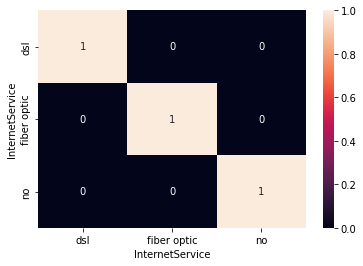

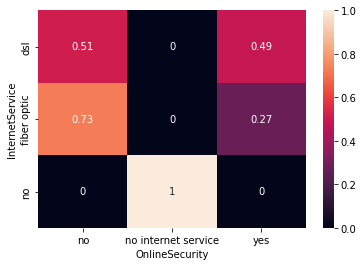

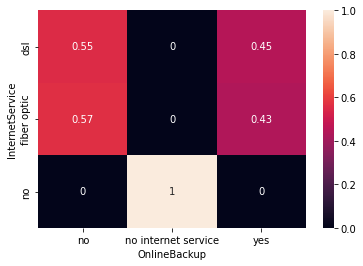

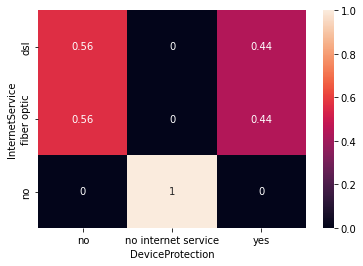

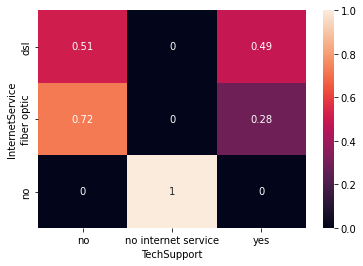

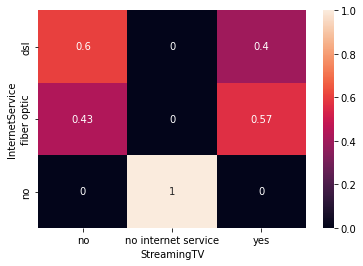

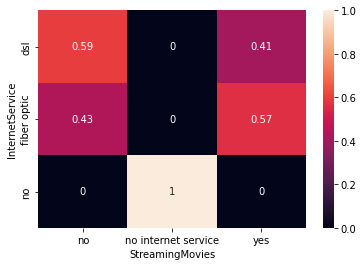

In [19]:
# Investigating add ons in relation with Internet Service
add_ons = ['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for c, n in enumerate([c for c in add_ons]): 
    plt.figure(c)
    _ = pd.crosstab(df['InternetService'], 
                    df[n], 
                    normalize = 'index')
    sns.heatmap(_, annot = True)

**Observation**

    - We might assume to have 2 different age groups: we can call them single individuals and family
         This is supported by the dependants and partner dimensions
    - The high share of churns within OnlineSecurity and OnlineBackup is driven by customers with fiber optic which. 
          Almost 80% of customers with fiber optic don't have such add ons. Maybe they are included in th fiber optic plan

# Analysing Numerical Data #

One of the first questions I'm asking myself is related to contract tenure: 

- After how long do customer tend to churn? 
- Can we observe different tenure lenghts between churners and non-churners?

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Tenures among Churn Type')

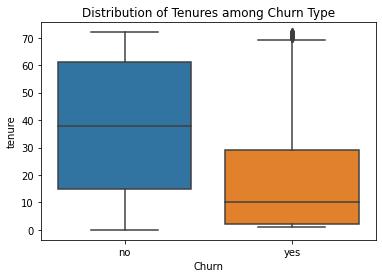

In [29]:
sns.boxplot(df['Churn'], df['tenure'])
plt.title('Distribution of Tenures among Churn Type')

Text(0.5, 1.0, 'Density distribution of Tenure by Churn')

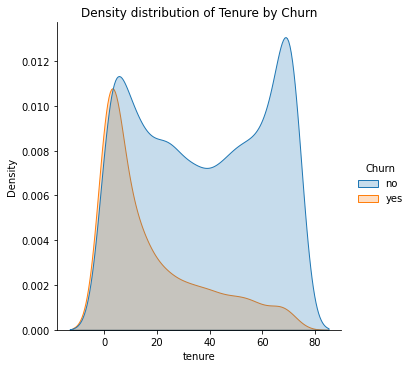

In [27]:
sns.displot(df, x='tenure', hue= 'Churn', kind = 'kde', fill = True)
plt.title("Density distribution of Tenure by Churn")

Text(0.5, 1.0, 'ECDF of Tenure by Churn Type')

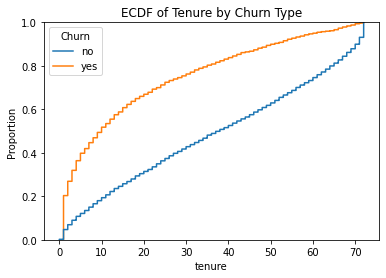

In [28]:
sns.ecdfplot(data=df, x="tenure", hue="Churn")
plt.title("ECDF of Tenure by Churn Type")

There  is a clear pattern occurring in the first ~ 12 months contract. This is the critical part where customers tend to churn the most. Once the contrac approaches ~ 2 years the likelihood of churning decreases. 

**Almost 50% of the churners have a contract len to 10 months**. If we understand what happens in this range **we might reduce the churner by 50%**. 

- Why are contracts been cancelled within the first year? 
- Are they month-to-month contracts? If yes what is the monthly charge for them? What kind of product do they have? 


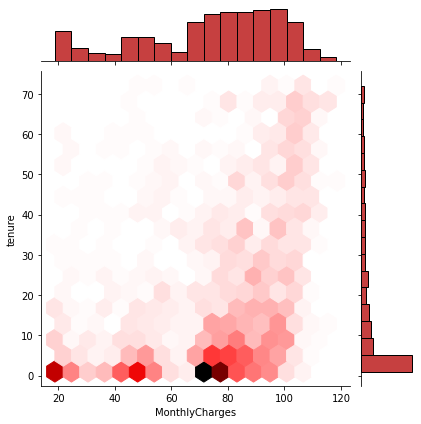

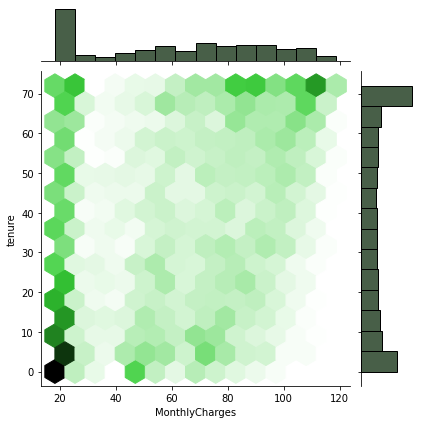

In [91]:
sns.jointplot(data = df[df['Churn']=='yes'], x ='MonthlyCharges', y = 'tenure', kind = 'hex', color = '#b30000')
sns.jointplot(data = df[df['Churn']=='no'], x ='MonthlyCharges', y = 'tenure', kind = 'hex' , color ='#0a290a')

## .. To be continued ##

## Here starts the testing environment ##

In [ ]:
sns.displot(df, x='MonthlyCharges', hue= 'Churn', kind = 'kde', fill = True)
plt.title("Density distribution of Monthly Charges")

In [ ]:
sns.boxplot(df['InternetService'],df['MonthlyCharges'])
plt.title("Distribution of Monthly Charges within Internet Service Groups")

In [ ]:
sns.boxplot(df['Churn'], df['tenure'])

In [ ]:
df[['Churn', 'tenure']].groupby('Churn').agg(['mean', 'median'])

The average tenure length for churners is around 17 months with a median of 10. 

This means that the main problem to tackle is within the first year contract.

In [ ]:
one_y_tenure = df[df['tenure']<=10]

In [ ]:
for c, n in enumerate([c for c in one_y_tenure.columns if one_y_tenure[c].dtype == 'O']): 
    plt.figure(c)
    _ = sns.countplot(data = one_y_tenure, x = n, hue = 'Churn')
    plt.xticks(rotation =75)

In [ ]:
df.hist(figsize = (14,18), bins = 10)

In [ ]:
sns.pairplot(df[['Churn','tenure', 'MonthlyCharges','TotalCharges']], hue = 'Churn', size = 3.5)

I will define a converter function to change obj into boolean numerical. 

In [ ]:
to_convert = ['Churn']
for c in to_convert: 
    if c in df.columns: 
        df[c] = df[c].apply(converter)

In [ ]:
def converter(col): 
    if col == 'yes': 
        return 1 
    else: 
        return 0

In [ ]:
df = df.drop('customerID',axis = 1)

In [ ]:
def percentage_of_totals(col1,data = df,target = 'Churn'): 
    ct = pd.crosstab(data[target], 
                     data[col1], 
                     normalize = 'index')
    sns.heatmap(ct, annot = True)
    plt.show()

In [ ]:
sns.countplot(data = df , x = 'InternetService' , hue = 'OnlineSecurity')

In [ ]:
percentage_of_totals('OnlineSecurity')

In [ ]:
df_dummies

In [ ]:
df_corr = df_dummies.corr()
